In [1]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans



C:\Users\shrav\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [3]:
df_data = pd.read_csv('churn.csv')

In [4]:
df_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2907-ILJBN,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,3896-RCYYE,Female,0.0,No,No,67.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
2,9764-REAFF,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
3,6651-RLGGM,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,5879-SESNB,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No
5,8670-MEFCP,Female,0.0,Yes,Yes,36.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),92.90,3379.25,No
6,9782-LGXMC,Female,0.0,Yes,Yes,49.0,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),61.75,3024.15,No
7,0931-MHTEM,Female,0.0,No,No,54.0,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),100.05,5299.65,No
8,4993-JCRGJ,Male,0.0,No,No,26.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,84.30,2281.60,No
9,7369-TRPFD,Male,0.0,No,No,19.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,279.20,No


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               12335 non-null  object 
 1   gender                   12335 non-null  object 
 2   SeniorCitizen            12335 non-null  float64
 3   Partner                  12335 non-null  object 
 4   Dependents               12335 non-null  object 
 5   tenure                   12335 non-null  float64
 6   CallService              12335 non-null  object 
 7   MultipleConnections      12335 non-null  object 
 8   InternetConnection       12335 non-null  object 
 9   OnlineSecurity           12335 non-null  object 
 10  OnlineBackup             12335 non-null  object 
 11  DeviceProtectionService  12335 non-null  object 
 12  TechnicalHelp            12335 non-null  object 
 13  OnlineTV                 12335 non-null  object 
 14  OnlineMovies          

In [6]:
df_data.loc[df_data.Churn=='No','Churn'] = 0 
df_data.loc[df_data.Churn=='Yes','Churn'] = 1

In [7]:
df_data = df_data.dropna()

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12335 entries, 0 to 12334
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               12335 non-null  object 
 1   gender                   12335 non-null  object 
 2   SeniorCitizen            12335 non-null  float64
 3   Partner                  12335 non-null  object 
 4   Dependents               12335 non-null  object 
 5   tenure                   12335 non-null  float64
 6   CallService              12335 non-null  object 
 7   MultipleConnections      12335 non-null  object 
 8   InternetConnection       12335 non-null  object 
 9   OnlineSecurity           12335 non-null  object 
 10  OnlineBackup             12335 non-null  object 
 11  DeviceProtectionService  12335 non-null  object 
 12  TechnicalHelp            12335 non-null  object 
 13  OnlineTV                 12335 non-null  object 
 14  OnlineMovies          

In [9]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df_data.columns:
    if df_data[column].dtype == object and column != 'customerID':
        if df_data[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df_data[column] = le.fit_transform(df_data[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df_data = pd.get_dummies(data = df_data,columns = dummy_columns) 

In [10]:
df_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,BillingMethod,MonthlyServiceCharges,TotalAmount,...,OnlineMovies_No,OnlineMovies_No internet service,OnlineMovies_Yes,Agreement_Month-to-month,Agreement_One year,Agreement_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2907-ILJBN,0,0.000000,1,1,11.000000,1,0,20.600000,233.900000,...,0,1,0,0,1,0,0,0,0,1
1,3896-RCYYE,0,0.000000,0,0,67.000000,0,1,53.400000,3579.150000,...,0,0,1,1,0,0,0,1,0,0
2,9764-REAFF,0,0.000000,1,0,59.000000,1,0,18.400000,1057.850000,...,0,1,0,0,0,1,1,0,0,0
3,6651-RLGGM,1,0.000000,1,1,67.000000,1,0,26.300000,1688.900000,...,0,1,0,0,0,1,0,0,0,1
4,5879-SESNB,0,0.000000,0,0,11.000000,1,0,75.250000,888.650000,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12330,6894-LFHLY,1,0.357423,0,1,2.927730,1,1,40.151251,76.135546,...,0,1,0,1,0,0,0,0,0,1
12331,0639-TSIQW,0,0.000000,0,0,63.430477,0,0,96.252187,6310.292602,...,1,0,0,1,0,0,0,1,0,0
12332,0639-TSIQW,1,0.000000,0,1,49.677352,0,0,70.445975,4091.168541,...,1,0,0,1,0,0,0,1,0,0
12333,0607-DAAHE,1,0.660002,1,1,20.659911,1,1,55.819099,560.153643,...,0,1,0,1,0,0,0,0,0,1


In [12]:
all_columns = []
for column in df_data.columns:
    column = column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_")
    all_columns.append(column)

df_data.columns = all_columns

In [13]:
glm_columns = 'gender'

for column in df_data.columns:
    if column not in ['Churn','customerID','gender']:
        glm_columns = glm_columns + ' + ' + column

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
 

glm_model = smf.glm(formula='Churn ~ {}'.format(glm_columns), data=df_data, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

C:\Users\shrav\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                12335
Model:                            GLM   Df Residuals:                    12304
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6835.0
Date:                Wed, 27 Jan 2021   Deviance:                       13670.
Time:                        13:26:18   Pearson chi2:                 1.20e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [15]:
np.exp(res.params)

Intercept                                      1.050583
gender                                         0.933391
SeniorCitizen                                  1.454171
Partner                                        1.091097
Dependents                                     1.379863
tenure                                         0.965078
CallService                                    0.749418
BillingMethod                                  1.075561
MonthlyServiceCharges                          1.008316
TotalAmount                                    0.999971
MultipleConnections_No                         0.771931
MultipleConnections_No_phone_service           1.392011
MultipleConnections_Yes                        0.977707
InternetConnection_DSL                         0.799884
InternetConnection_Fiber_optic                 1.274358
InternetConnection_No                          1.030651
OnlineSecurity_No                              1.110051
OnlineSecurity_No_internet_service             1

In [16]:
#create feature set and labels
X = df_data.drop(['Churn','customerID'],axis=1)
y = df_data.Churn

In [17]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [18]:
#building the model
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.87
Accuracy of XGB classifier on test set: 0.86


In [19]:
y_pred = xgb_model.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       334
           1       0.88      0.80      0.83       283

    accuracy                           0.86       617
   macro avg       0.86      0.85      0.85       617
weighted avg       0.86      0.86      0.85       617



In [24]:
1/(1+np.exp(-0.032))


0.5079993174032311

In [25]:
from xgboost import plot_importance

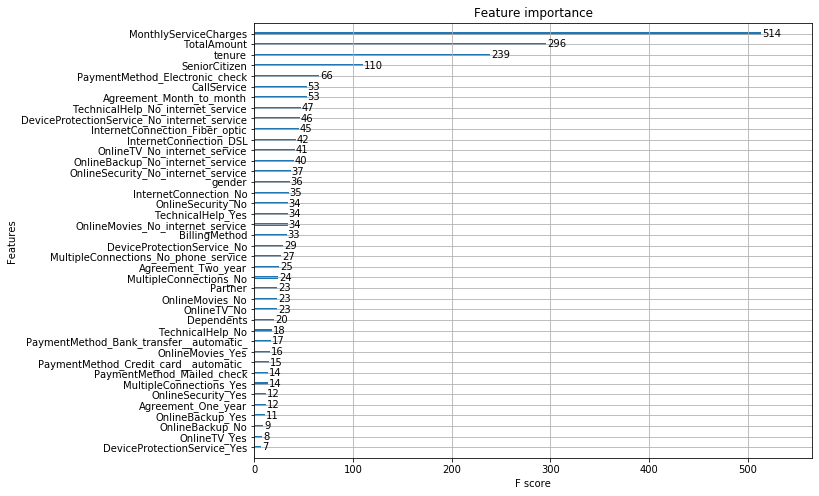

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [27]:
df_data['proba'] = xgb_model.predict_proba(df_data[X_train.columns])[:,1]

In [28]:
df_data[['customerID', 'proba']].head()

,customerID,proba
0,2907-ILJBN,0.031765
1,3896-RCYYE,0.139185
2,9764-REAFF,0.023857
3,6651-RLGGM,0.007206
4,5879-SESNB,0.578305
